# Credit Risk Analysis with the German Credit Dataset

I am using the **Statlog (German Credit Data)** dataset from the UCI Machine Learning Repository to develop a predictive model for credit risk. The goal of this analysis is to understand what factors contribute to classifying a client as a "good" or "bad" credit risk and then build a transparent and well-documented model.

**Why This Project?**  
In financial institutions, credit scoring and risk assessment are crucial. By exploring this dataset, I can demonstrate my ability to handle real-world data, perform exploratory data analysis (EDA), preprocess the information, and create interpretable machine learning models that stakeholders can trust.

**Dataset Description**  
This dataset consists of 1000 instances, each representing a person’s credit-related attributes, and a label indicating whether they are considered a good or bad credit risk. The data includes both numerical and categorical variables. Before assigning column names, I will first load the raw data to understand its structure.

*For a detailed description of each attribute (e.g., the meaning of codes like A40, A43, etc.), please refer to the [detailed documentation](../docs/german_dataset_description.md) in the `docs/` folder of this repository.* There, you will find a breakdown of every categorical code and the cost matrix indicating the misclassification penalties.

In this notebook, I will:

1. Load and inspect the dataset.
2. Assign meaningful column names based on the dataset documentation.
3. Perform exploratory data analysis (EDA).
4. Prepare the data for modeling.
5. Build and evaluate predictive models.
6. Ensure interpretability and compliance with best practices.


In [1]:
import pandas as pd


# Set display options so I can view more columns at once
pd.set_option('display.max_columns', 25)

## Initial Data Inspection

I have a file named `german.data` which, according to the UCI repository, contains the main dataset. The data is likely space-separated and does not include column headers. Before assigning my own column names, I want to see how the data looks in its raw form. This approach helps me confirm the number of columns, check for any irregularities, and ensure that the file is read correctly.

After this initial inspection, I will refer to the documentation (`german.doc`) to understand each attribute. Once I’ve confirmed the structure, I will assign meaningful column names.

**Why not assign column names immediately?**  
- By first looking at the raw data, I confirm the delimiter (spaces), the number of columns, and the general shape of the data.
- This step also helps me catch potential issues (e.g., if the file didn’t load properly or if there are unexpected characters).


In [6]:
raw_df = pd.read_csv("../data/german.data", sep='\s+', header=None)

# Check the shape of the dataset
print("Shape of raw dataset:", raw_df.shape)

#Display the first few rows to see the raw structure
raw_df.head()

Shape of raw dataset: (1000, 21)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


I can see from the output that:

- The dataset likely has 1000 rows and should have 21 columns (20 features + 1 target).
- Each row appears to be split into separate columns as expected.

**Next Step**: Assign Column Names

Now that I’ve confirmed the structure, I will use the documentation to give each column a meaningful name. According to the `german.doc` and UCI’s website, the dataset contains the following attributes:

1. Status of existing checking account
2. Duration in month
3. Credit history
4. Purpose
5. Credit amount
6. Savings account/bonds
7. Present employment since
8. Installment rate in percentage of disposable income
9. Personal status and sex
10. Other debtors/guarantors
11. Present residence since
12. Property
13. Age in years
14. Other installment plans
15. Housing
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone
20. Foreign worker
21. Target (1 = good risk, 2 = bad risk)

I will now reload the dataset with these column names so that the DataFrame is easier to understand and my analysis is more transparent.

In [8]:
column_names = [
    "Status_of_existing_checking_account",
    "Duration_in_month",
    "Credit_history",
    "Purpose",
    "Credit_amount",
    "Savings_account_bonds",
    "Present_employment_since",
    "Installment_rate_in_percentage_of_disposable_income",
    "Personal_status_and_sex",
    "Other_debtors_or_guarantors",
    "Present_residence_since",
    "Property",
    "Age_in_years",
    "Other_installment_plans",
    "Housing",
    "Number_of_existing_credits_at_this_bank",
    "Job",
    "Number_of_people_being_liable_to_provide_maintenance_for",
    "Telephone",
    "Foreign_worker",
    "Target"
]

# Reload the dataset with defined column names
df = pd.read_csv("../data/german.data", sep='\s+', header=None, names=column_names)

# Verify the first few rows with column names
df.head()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_or_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## Exploratory Data Analysis (EDA)

Now that I have the dataset loaded with proper column names, I want to get a deeper understanding of its structure and quality.

**Key questions at this stage:**
- What types of variables do I have (numeric, categorical)?
- Are there any missing values?
- What does the distribution of my target variable look like?
- Are the numeric variables normally distributed or skewed?
- What are the typical ranges for these numeric variables?

By answering these questions, I can plan data cleaning steps and decide on suitable modeling techniques.

In [9]:
# Check the shape of the data (rows, columns)
print("Data shape:", df.shape)

# Use df.info() to see data types and non-null counts
df.info()

Data shape: (1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status_of_existing_checking_account                       1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account_bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Person

From the `df.info()` output, I can see:

- All columns are non-null, which suggests there are no missing values in the usual sense (NaN). However, I must be careful because sometimes datasets encode missing values as special codes (e.g., "?" or "NA"). I will do a quick check for unusual values later.
- The data types might be all `object` or mixed. I know some columns are numeric and some are categorical. For numeric columns, I'll convert them from `object` to a numeric type if needed.

Next, I'll inspect the numeric columns using `df.describe()` which provides summary statistics like mean, median, and standard deviation. This gives me a quick sense of the data’s distribution.


In [10]:
df.describe(include='all')

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_or_guarantors,Present_residence_since,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Target
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


`df.describe()` gives me:

- For numeric columns: mean, std (standard deviation), min, max, and quartiles.
- For categorical columns: number of unique categories, the most frequent category, and its frequency.

This helps me identify the nature of each column. I may find that some columns that should be numeric are still considered objects. If that's the case, I will convert them to a numeric dtype.

Now, I want to explicitly check the distribution of the target variable.

In [11]:
# The target column is "Target"
# Value counts will tell me how many "good" (1) and "bad" (2) credit risks I have
df['Target'].value_counts()

Target
1    700
2    300
Name: count, dtype: int64

If I see, for example:
- 700 entries for "1" (good risk)
- 300 entries for "2" (bad risk)

This means the data is somewhat imbalanced (70% good vs. 30% bad). It's not extremely skewed, but it's worth noting. Class imbalance may affect model performance and evaluation metrics, so I'll keep that in mind for later steps.

Next, I'll take a closer look at a few columns (like `Credit_amount` and `Age_in_years`) to understand their distributions. For numeric variables, I'll create histograms. For categorical variables, I'll look at `value_counts()` more closely.

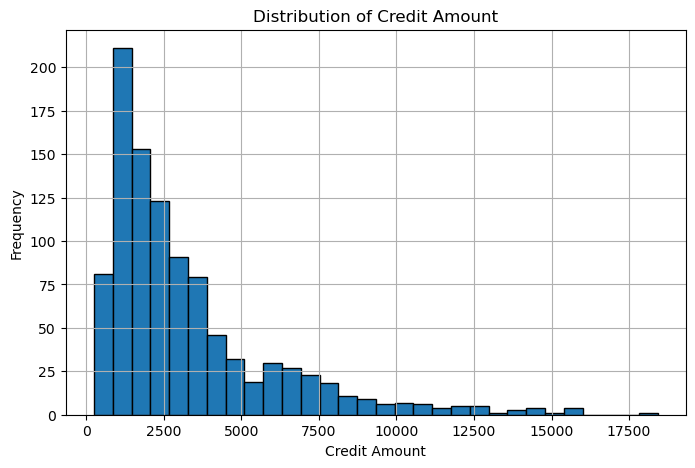

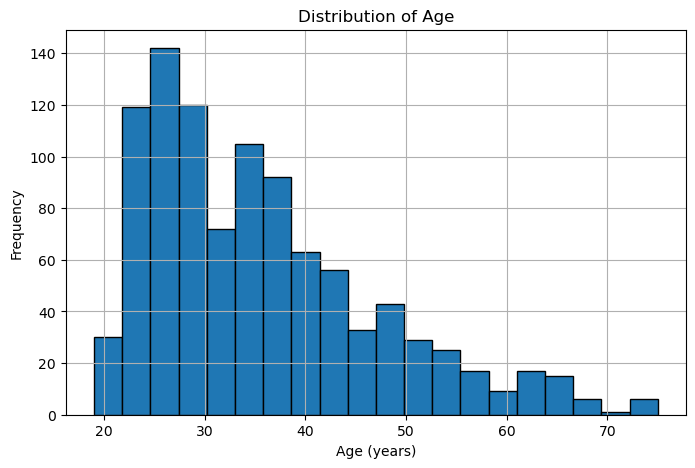

In [12]:
import matplotlib.pyplot as plt

# Let's pick a numeri column, e.g., "Credit_amount"
plt.figure(figsize=(8,5))
df['Credit_amount'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount')
plt.ylabel('Frequency')
plt.show()

# Similarly, for Age
plt.figure(figsize=(8,5))
df['Age_in_years'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

From the histograms, I can comment on the distribution:

- **Credit Amount**: If I see a right-skewed distribution (a long tail to the right), that tells me most people have smaller credit amounts and a few have very large ones. I might consider transformations (like a log transform) if it helps modeling later.

- **Age in Years**: The distribution appears unimodal and slightly right-skewed, with the majority = of individuals falling between 20 and 40 years. There is a gradual decline in frequency for older age groups. No immediate transformation seems necessary, but scaling could be useful depending on the analysis.

Now I’ll quickly examine a categorical feature. Let’s take "Purpose" as an example and see what categories are present.

In [13]:
df['Purpose'].value_counts()

Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64

I see several codes like A40, A43, etc. These correspond to categories such as "car (new)", "radio/television", and more. As mentioned before, the full mapping is provided in the detailed documentation.

Having this reference helps ensure I understand the context behind each category. This is important for feature engineering and model interpretation later on.

Now that I have a basic understanding of the distributions and types of variables, I can think about data cleaning steps:

- Are there any columns that need type conversion?
- Are there any suspicious outliers in numeric data?
- Do I need to handle categorical variables by encoding them (one-hot encoding, etc.)?

## Data Cleaning and Preprocessing

Now that I have a solid understanding of the dataset, it’s time to prepare it for modeling. In this section, I will:

- Identify numeric and categorical columns.
- Ensure that numeric columns have proper numeric data types.
- Convert categorical columns to `category` dtype for clarity and efficiency.
- Consider re-encoding the target variable for convenience.
- Check for any outliers or unusual values in numeric columns.
- Confirm no missing values need handling.

These steps will help ensure that the data is in a good shape before I move on to feature engineering and modeling.

In [16]:
# Let's separate numeric and categorical columns based on domain knowledge and data inspection.
# According to the documentation, there are 7 numerical and 13 categorical attributes. 

# Potential numeric columns (from the dataset description):
numeric_cols = [
    "Duration_in_month",
    "Credit_amount",
    "Installment_rate_in_percentage_of_disposable_income",
    "Present_residence_since",
    "Age_in_years",
    "Number_of_existing_credits_at_this_bank",
    "Number_of_people_being_liable_to_provide_maintenance_for"
]

# The rest (excluding 'Target') should be categorical
# I'll create a list of all columns except the target
all_features = [col for col in df.columns if col != 'Target']
categorical_cols = [col for col in all_features if col not in numeric_cols]

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['Duration_in_month', 'Credit_amount', 'Installment_rate_in_percentage_of_disposable_income', 'Present_residence_since', 'Age_in_years', 'Number_of_existing_credits_at_this_bank', 'Number_of_people_being_liable_to_provide_maintenance_for']
Categorical columns: ['Status_of_existing_checking_account', 'Credit_history', 'Purpose', 'Savings_account_bonds', 'Present_employment_since', 'Personal_status_and_sex', 'Other_debtors_or_guarantors', 'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone', 'Foreign_worker']


In [17]:
# Check current data types
print("Data types before conversion:\n", df.dtypes)

# Convert categorical columns to category dtype if they are not already
for col in categorical_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

# Re-check data types
print("\nData types after conversion:\n", df.dtypes)

Data types before conversion:
 Status_of_existing_checking_account                         object
Duration_in_month                                            int64
Credit_history                                              object
Purpose                                                     object
Credit_amount                                                int64
Savings_account_bonds                                       object
Present_employment_since                                    object
Installment_rate_in_percentage_of_disposable_income          int64
Personal_status_and_sex                                     object
Other_debtors_or_guarantors                                 object
Present_residence_since                                      int64
Property                                                    object
Age_in_years                                                 int64
Other_installment_plans                                     object
Housing                        

In [18]:
# Current target: 1 = Good, 2 = Bad
# Let's map this to a binary variable for modeling convenience:
# Good (1) -> 0
# Bad (2) -> 1

df['Target'] = df['Target'].map({1:0, 2:1})

# Check the new distribution of the target
df['Target'].value_counts()

Target
0    700
1    300
Name: count, dtype: int64

### Checking for Outliers

Outliers can affect model performance, especially for certain algorithms. I'll do a quick check by looking at the numeric columns, plotting boxplots or using basic statistical measures. If I find outliers, I might consider transformations or robust scaling in later steps.

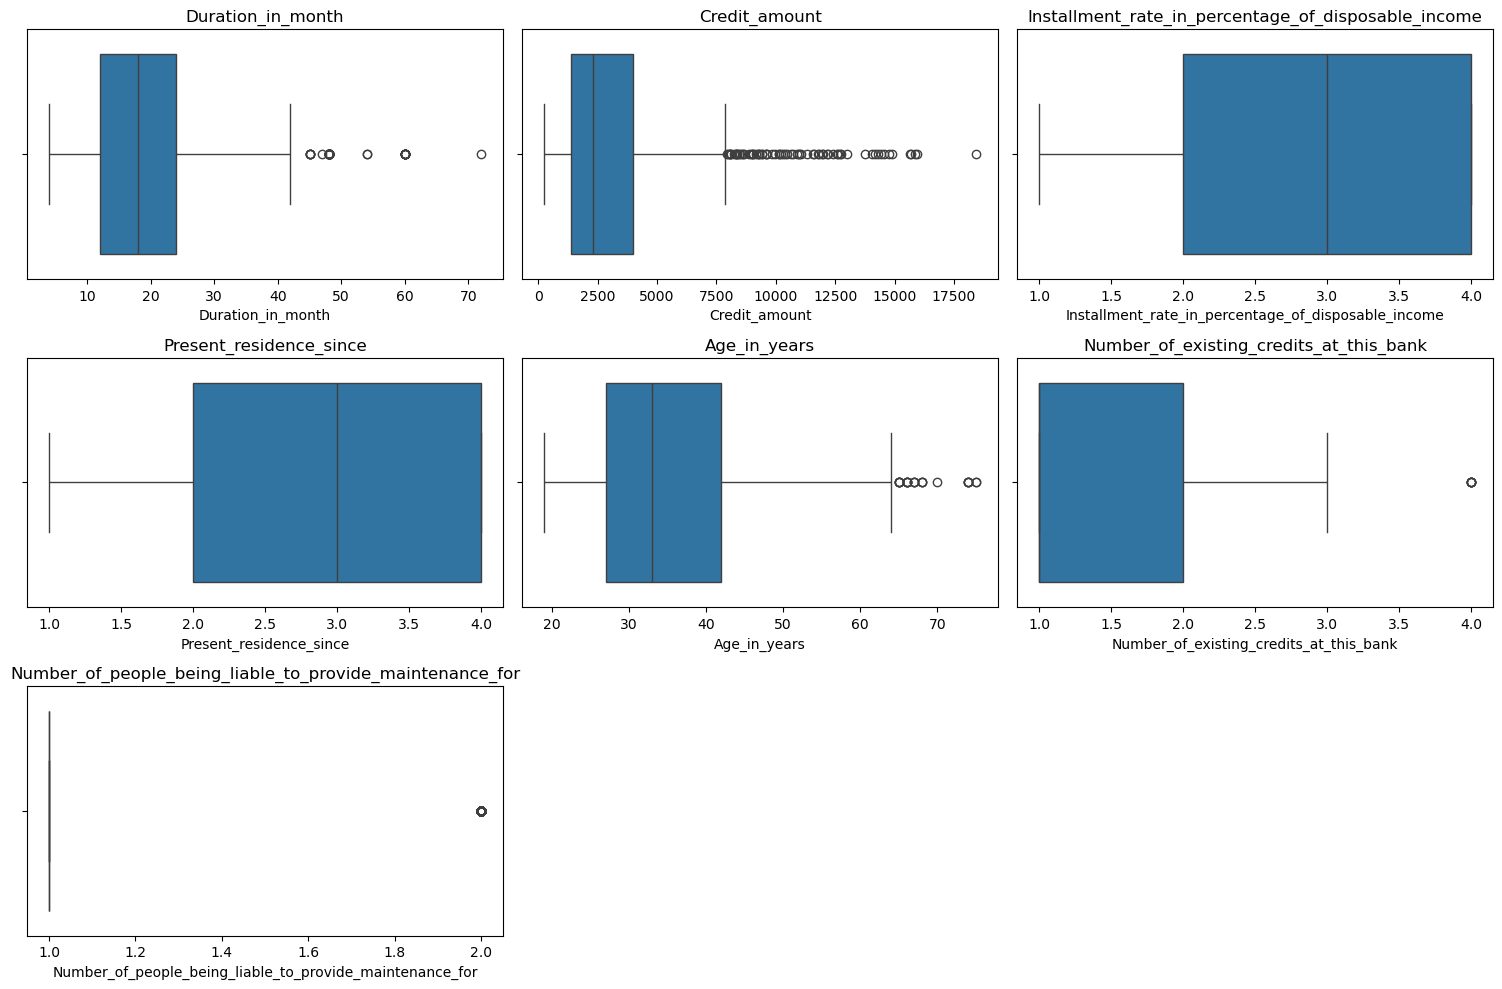

In [20]:
import seaborn as sns

# Plot boxplots for numeric variables to visually inspect for outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], orient='h')
    plt.title(col)
plt.tight_layout()
plt.show()

From the boxplots, I can identify if any numeric columns have unusually large or small values compared to the rest. For example, `Credit_amount` might have a long tail, indicating a few very large credit amounts.

I won't take immediate action on outliers at this moment, but I'll keep this in mind for when I choose and tune my models. Some models are more sensitive to outliers than others.

In [21]:
# Check if there are any missing values
df.isnull().sum()

Status_of_existing_checking_account                         0
Duration_in_month                                           0
Credit_history                                              0
Purpose                                                     0
Credit_amount                                               0
Savings_account_bonds                                       0
Present_employment_since                                    0
Installment_rate_in_percentage_of_disposable_income         0
Personal_status_and_sex                                     0
Other_debtors_or_guarantors                                 0
Present_residence_since                                     0
Property                                                    0
Age_in_years                                                0
Other_installment_plans                                     0
Housing                                                     0
Number_of_existing_credits_at_this_bank                     0
Job     

**Data Cleaning Summary:**

- I identified numeric and categorical columns and set categorical columns to the `category` dtype.
- I remapped the target variable to a binary format: 0 for good risk, 1 for bad risk.
- I performed a quick check for outliers using boxplots.
- I confirmed that there are no missing values (NaN) in the dataset.

With this information, I have a clearer picture of the data and any potential issues. The next steps might involve:

- Encoding categorical variables into numeric form (for algorithms that require it).
- Considering data transformations (e.g., log-scaling `Credit_amount` if needed).
- Feature engineering to create new, more informative features.

I am now ready to move closer to the modeling phase, but before that, I might do some additional feature engineering or data transformations depending on the modeling approach.

### Categorical Encoding

To prepare the data for modeling, I need to convert categorical features into a numerical format. I will use one-hot encoding (dummy variables) since it is straightforward and widely used.

- Each categorical column will be split into multiple binary columns (0/1), one for each category.
- I will use `drop_first=True` to avoid redundant columns and reduce multicollinearity.

In [22]:
# Before encoding, let's remember the categorical columns:
print("Categorical columns:", categorical_cols)

# I'll create a new DataFrame with encoded categorical variables.
# pd.get_dummies() automatically handles categorical columns and creates new binary columns.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Shape before encoding:", df.shape)
print("Shape after coding:", df_encoded.shape)

# Check the first few rows of the encoded DataFrame
df_encoded.head()

Categorical columns: ['Status_of_existing_checking_account', 'Credit_history', 'Purpose', 'Savings_account_bonds', 'Present_employment_since', 'Personal_status_and_sex', 'Other_debtors_or_guarantors', 'Property', 'Other_installment_plans', 'Housing', 'Job', 'Telephone', 'Foreign_worker']
Shape before encoding: (1000, 21)
Shape after coding: (1000, 49)


,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for,Target,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,Credit_history_A31,...,Property_A122,Property_A123,Property_A124,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_worker_A202
0,6,1169,4,4,67,2,1,0,False,False,False,False,...,False,False,False,False,True,True,False,False,True,False,True,False
1,48,5951,2,2,22,1,1,1,True,False,False,False,...,False,False,False,False,True,True,False,False,True,False,False,False
2,12,2096,2,3,49,1,2,0,False,False,True,False,...,False,False,False,False,True,True,False,True,False,False,False,False
3,42,7882,2,4,45,1,2,0,False,False,False,False,...,True,False,False,False,True,False,True,False,True,False,False,False
4,24,4870,3,4,53,2,2,1,False,False,False,False,...,False,False,True,False,True,False,True,False,True,False,False,False


### Train/Test Split

Before building a model, I need to split the dataset into training and testing subsets.

- **Train set**: Used to fit the model (learn the patterns).
- **Test set**: Used to evaluate the model performance on unseen data.

This helps prevent overfitting and gives a more honest assessment of how the model might perform on new, real-world data.

In [24]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

# Perform a train/test split
# test_size=0.2 means 20% of the data will be for testing, and 80% for training.
# random_state is set for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shale:", X_test.shape, y_test.shape)

Training set shape: (800, 48) (800,)
Test set shale: (200, 48) (200,)


Now I have:

- A fully numeric, encoded dataset (`X`).
- A binary target variable (`y`).
- Separate training and testing sets.